# Полносвязные нейронные сети

В этой лабораторной работе будут задействованы полносвязные слои. Необходимо решить ряд задач с их помощью.  Набор библиотек: tensorflow, numpy, matplotlib, random

In [ ]:
# Импорт библиотек

import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.callbacks import EarlyStopping
import keras.datasets
import tensorflow as tf

## Генерация датасетов

Первая задача - классификация генерированных данных. Для начала сформируйте датасет по следующему принципу: первая группа точек (первый класс) распределена по площади круга радиусом 0.8, вторая группа - по площади кольца с R=2 и r=1. Суммарное количество точек N=1000, соотношение классов - 1:1.

По заданным условиям сгенерируйте две координаты для каждой точки как случайные величины, набор этих координат занесите в массив X_train. Каждой точке из этого массива должен соответствовать лейбл класса - его занесите в y_train. Постройте график распределения.

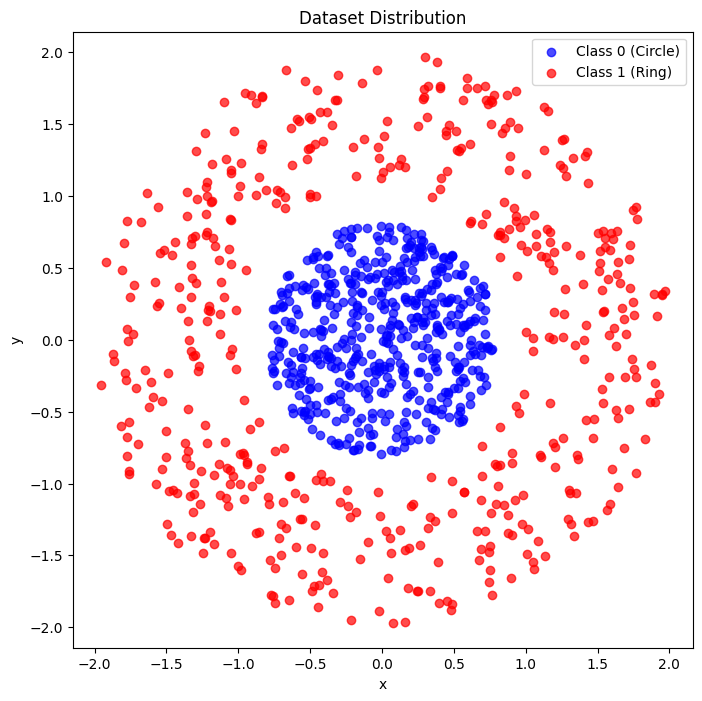

(array([[ 0.34400302,  0.34388374],
        [-0.56122068, -0.11748093],
        [ 0.23285458,  0.4218003 ],
        [ 0.72576643, -0.31727713],
        [ 0.42879733,  0.57576784]]),
 array([0., 0., 0., 0., 0.]))

In [ ]:
# Генерация данных

# Параметры генерации
N = 1000  # Количество точек
class_ratio = 0.5  # Соотношение классов
N_per_class = int(N * class_ratio)  # Количество точек для каждого класса

# Генерация для первого класса (Класс 0) (круг с радиусом 0.8)
radius_circle = 0.8
# Генерация случайных и равномернораспределённых полярных координат точек
angles_circle = 2 * np.pi * np.random.rand(N_per_class) # Углы в диапазоне [0,2π] - определяют направление (или положение) каждой точки в полярных координатах
radii_circle = radius_circle * np.sqrt(np.random.rand(N_per_class))  # Радиусы - опредляют место точки на напралвлении в полярных координатах
# Конвертация полярных координат в декартовы
x_circle = radii_circle * np.cos(angles_circle)
y_circle = radii_circle * np.sin(angles_circle)

# Генерация для второго класса (Класс 1) (кольцо с внешним радиусом R=2 и внутрениим радиусом r=1)
R_ring = 2
r_ring = 1
# Генерация случайных и равномернораспределённых полярных координат точек
angles_ring = 2 * np.pi * np.random.rand(N_per_class) # Углы в диапазоне [0,2π]
radii_ring = np.sqrt(np.random.uniform(r_ring**2, R_ring**2, N_per_class))  # Радиусы в диапазоне [r_ring^2, R_ring^2]
# Конвертация полярных координат в декартовы
x_ring = radii_ring * np.cos(angles_ring)
y_ring = radii_ring * np.sin(angles_ring)

# np.sqrt() в обоих случаях обеспечивает равномерное распределение точек по окружности, а не их группировку вблизи центра


# Формирование датасетов

# Двумерный массив X_train
X_train = np.vstack((np.column_stack((x_circle, y_circle)),
                     np.column_stack((x_ring, y_ring))))
# Одномерный плоский массив y_train
y_train = np.hstack((np.zeros(N_per_class), np.ones(N_per_class)))


# Построение графика

plt.figure(figsize=(8, 8))
plt.scatter(x_circle, y_circle, color='blue', alpha=0.7, label='Class 0 (Circle)')
plt.scatter(x_ring, y_ring, color='red', alpha=0.7, label='Class 1 (Ring)')
plt.title("Dataset Distribution")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.axis('equal')
plt.show()


# Отображение кусочка датасета
X_train[:5], y_train[:5]

## Классификация сгенерированных данных

Классифицируйте эти данные с помощью трех разных моделей, использующих полносвязные слои. Для всех моделей используйте метрику accuracy. Первая модель должна иметь не более двух слоев (включая выходной) и по два нейрона в каждом слое. Во второй модели добавьте к первому слою ещё один нейрон. Последнюю модель составляйте по своему усмотрению с целью максимально быстро добиться 100% точности.

### Первая модель (2 слоя: 2 нейрона в каждом слое)

In [ ]:
# Определение модели
# Sequential - последовательный тип модели, слои добавляются друг за другом
model = Sequential([
    # Первый слой (скрытый): 2 нейрона, функция активации - ReLU
    # Входные данные - одномерный массив с 2мя координатами
    # ReLU - стандартный выбор для функции активации
    Dense(units=2, activation='relu', input_shape=(2,)),
    # Выходной слой: 2 нейрона, функция активации - Softmax
    # Количество нейронов = количеству классов
    # Softmax - функция активации для выходного слоя нейронов в задачах классификации.
    # Она переводит выходные значения сети в вероятности принадлежности конкретного элемента выборки к одному из класов.
    Dense(units=2, activation='softmax')  # Выходной слой: 2 нейрон, функция активации - Softmax
])

# Компиляция модели
model.compile(
    # Adam - отличный оптимизатор по умолчанию для большинства задач
    optimizer='adam',
    # sparse_categorical_crossentropy используется, т.к.:
    # - Метки классов - целые числа (0 и 1 для двух классов в y_train).
    # - Над метками не произведено one-hot encoding
    loss='sparse_categorical_crossentropy',
    # Accuracy - по условию задачи + это естественный выбор для задач классификации
    # Accuracy вычисляет долю правильно классифицированных объектов из их общего числа.
    metrics=['accuracy'])

# Информация о модели
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 2)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12 (48.00 B)

 Trainable params: 12 (48.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Обучение и валидация модели
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4900 - loss: 0.7351 - val_accuracy: 0.6600 - val_loss: 0.4532
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5662 - loss: 0.7125 - val_accuracy: 0.6150 - val_loss: 0.4763
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5802 - loss: 0.6723 - val_accuracy: 0.5250 - val_loss: 0.4993
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5785 - loss: 0.6565 - val_accuracy: 0.4900 - val_loss: 0.5212
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5798 - loss: 0.6625 - val_accuracy: 0.4700 - val_loss: 0.5425
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5976 - loss: 0.6505 - val_accuracy: 0.4650 - val_loss: 0.5584
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6305 - loss: 0.6224 - val_accuracy: 0.4650 - val_loss: 0.5748
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6534 - loss: 0.6257 - val_accuracy: 0.4850 - val_loss

In [ ]:
"""
Обучение производится по эпохам. В каждую эпоху в нейросеть по батчам скармливается весь датасет и пошагово обновляются веса.

epochs
- определяет количество раз, которое весь обучающий набор данных проходит через модель во время обучения
- 20 - Это разумное число для такого небольшого набора данных
Можно увеличить или уменьшить количество периодов в зависимости от результата:
- Если модель значительно улучшается с каждой эпохой, то может помочь увеличение количества эпох.
- Если модель перестает улучшаться или начинает переобучаться, то лучше использовать меньшее количество эпох.
Количество эпох epochs обычно выбирают так, чтобы метрика качества на валидационной выборке не стала убывать (то есть, не произошло переобучения).

batch_size
Размер пакета определяет количество объектов, обработанных вместе, прежде чем модель обновит свои веса.
Обычно по умолчанию используется размер пакета, равный 32.
Эксперименты показывают, что выбор batch_size в диапазоне  32−512  в среднем обеспечивает хорошую обобщающую способность нейросети.

validation_split
Разделяет выборку на обучающую и тестовую в количестве 80% и 20% соответственно
Помогает оценить качество модели на основе неизвестных данных во время обучения.
"""

### Вторая модель (2 слоя: 3 нейрона в первом, 2 во втором)

In [ ]:
# Определение модели
model2 = Sequential([
    Dense(units=3, activation='relu', input_shape=(2,)),  # Первый слой (скрытый): 2 нейрона, функция активации - ReLU
    Dense(units=2, activation='softmax')  # Выходной слой: 2 нейрона, функция активации - Softmax
])

# Компиляция модели
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Информация о модели
model2.summary()

Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_54 (Dense)                     │ (None, 3)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 2)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17 (68.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Обучение и валидация модели
model2.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6415 - loss: 0.7726 - val_accuracy: 0.0000e+00 - val_loss: 1.1059
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6356 - loss: 0.7546 - val_accuracy: 0.0000e+00 - val_loss: 1.0664
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5907 - loss: 0.7622 - val_accuracy: 0.0000e+00 - val_loss: 1.0214
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6243 - loss: 0.7398 - val_accuracy: 0.0000e+00 - val_loss: 1.0030
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6326 - loss: 0.7205 - val_accuracy: 0.0150 - val_loss: 0.9784
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6331 - loss: 0.7136 - val_accuracy: 0.0550 - val_loss: 0.9509
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6038 - loss: 0.7235 - val_accuracy: 0.1050 - val_loss: 0.9271
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6417 - loss: 0.6938 - val_accuracy: 0

#### Эксперимент с добавлением 1 нейрона

**Эксперимент с добавлением 1 нейрона**

- Добавление нейрона в первый слой увеличивает пропускную способность модели (способность модели фиксировать более сложные закономерности в данных).
- Добавление нейронов может привести к переобучению, если модель станет слишком сложной по сравнению с набором данных.

Изменение архитектуры позволяет поэкспериментировать с соотношением между количеством нейронов и способностью модели обобщать неизвестные данные.

Сначала на 20 эпохах Accuracy оказалось меньше, чем у первой модели (0.61 < 0.82). Затем количество эпох было увеличено до 50, Accuracy составила 0.89.

Так могло произойти по следующим причинам:
1. Набор данных может быть относительно маленьким, поэтому добавление сложности (еще одного нейрона) может привести к переобучению модели.
2. Добавление нейронов может повлиять на оптимизацию, затрудняя сходимость модели за небольшое количество эпох.
3. Нейронные сети инициализируются со случайными весами. Добавление нейрона вводит дополнительные веса, и начальные значения могут привести к неоптимальной конфигурации в процессе обучения.

Итоги эксперимента:
- увеличение количества эпох до 50 позволило модели обучаться дольше, что дало ей время оптимизировать веса для добавленного нейрона. (см. п.2).
Это помогло модели лучше обрабатывать данные и использовать свои увеличенные возможности.
- модель с большим количеством эпох, даже на 20 эпохе имела бОльшую accuracy (0.61 < 0.72). Это наглядно показывает влияение начальных весов модели на её качество (см. п.3).

Значимость эксперимента: проиллюстрировать, что простое добавление нейронов не всегда гарантирует лучшее качество, особенно без тщательной настройки других гиперпараметров (например, эпох).

**Дополнительно: что лучше для бинарной классификации: Sigmoid или softmax**

The answer is not always a yes. You can always formulate the binary classification problem in such a way that both sigmoid and softmax will work. However you should be careful to use the right formulation.

Sigmoid can be used when your last dense layer has a single neuron and outputs a single number which is a score. Sigmoid then maps that score to the range [0,1]. You can then assume that this is a probability distribution and say that the prediction is class 1 if the probability is larger than 0.5 and class 0 other wise.

If you want to use softmax, you need to adjust your last dense layer such that it has two neurons. It must output two numbers which corresponds to the scores of each class, namely 0 and 1. Now, you can use softmax to convert those scores into a probability distribution. Finally, to get the predicted label, you still need to find the argmax in the probability distribution.

You can not use softmax when you have a single neuron in the last layer. This will lead to some strange behaviour and performance will drop. Obviously, you can also not use sigmoid when you formulate the problem with two dimensional last layer.

So it is either

`model.add(Dense(2, activation='softmax'))`   
or

`model.add(Dense(1, activation='sigmoid'))`   

      
Источник: https://datascience.stackexchange.com/questions/45246/can-i-use-the-softmax-function-with-a-binary-classification-in-deep-learning

### Третья модель (максимальнo быстрая точность 100%)

In [ ]:
# Определение модели
model3 = Sequential([
    Dense(units=128, activation='relu', input_shape=(2,)),  # Первый скрытый слой: 128 нейронов, функция активации - ReLU
    Dense(units=128, activation='relu'),                   # Второй скрытый слой: 128 нейронов, функция активации - ReLU
    Dense(units=2, activation='softmax')                 # Выходной слой: 2 нейрона, функция активации - Softmax
])

# Компиляция модели
model3.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

# Early stopping - отслеживает определенный показатель во время обучения и прекращает обучение, когда этот показатель перестает улучшаться
early_stopping = EarlyStopping(monitor='accuracy', patience=3, restore_best_weights=True)
# monitor - метрика для отслеживания
# patience - сколько эпох ждать после последнего улучшения, прежде чем остановить обучение (если метрика не улучшилась за это кол-во эпох, то обучение прекращается)
# restore_best_weights=True - гарантирует, что после остановки обучения веса модели будут восстановлены до наилучших значений, наблюдавшихся во время обучения
# Early stopping предотвращает переобучение, а также экономит время обучения


# Обучение и валидация модели
model3.fit(X_train, y_train, epochs=100, batch_size=16, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6199 - loss: 0.6430 - val_accuracy: 1.0000 - val_loss: 0.2829
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9738 - loss: 0.3387 - val_accuracy: 0.9700 - val_loss: 0.1251
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9991 - loss: 0.0770 - val_accuracy: 1.0000 - val_loss: 0.0533
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0321 - val_accuracy: 1.0000 - val_loss: 0.0328
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0206 - val_accuracy: 1.0000 - val_loss: 0.0269
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0124 - val_accuracy: 1.0000 - val_loss: 0.0213
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0113 - val_accuracy: 1.0000 - val_loss: 0.0155


#### Эксперименты с количеством нейронов

В начале была построена модель с 2мя слоями и 8 нейронами в каждом слое:
- 2 слоя обычно достаточно для простых датасетов, большее количество слоев добавило бы ненужной сложности.
- Один слой может не обладать достаточной емкостью для изучения сложных паттернов в наборе данных (например, для того, чтобы отличить круг от кольца).Второй слой необходим для увеличения ёмкости модели.
- Количество нейронов часто подбирается экспериментально.
- Для задачи бинарной классификации с 2 входными признаками обычно начинают с 1-2 скрытых слоев и 4-16 нейронов на слой. Затем можно эксперементировать с количетсвом нейронов, слоёв и методами регуляризации.

Далее были проведены эксперименты с использованием 4, 8, 16 и 128 нейронами в этих двух слоях:
- 4 - низкая производительность
- 8 - хорошая производительность
- 16 - ещё лучше производительность
- 128 - лучшая производительность (чуть лучше, чем у 16)

Результаты эксперимента:
1. Увеличенная ёмкость (большее количество нейронов) позволило модели лучше разделять классы и иметь достаточную мощность для быстрого изучения паттернов, что привело к более быстрому обучению.
2. После определенного момента добавление большего количества нейронов не приводит к существенному повышению производительности, особенно для простых наборов данных. Хотя 128 нейронов немного улучшили результаты, набор данных относительно мал, поэтому дополнительная емкость используется не полностью.
3. Риск переобучения: имеябольшее количетсво нейронов, модель может запоминать обучающие данные, а не обобщать их должным образом. В данном эксперементе модель не подверглась переобучению.

Таким образом:
- Выбор количества нейронов зависит от конкретного набора данных и задачи.
Единого правила для всех не существует, и тестирование нескольких конфигураций помогает найти оптимальную настройку.
- Баланс является ключевым фактором: для небольших и простых наборов данных часто бывает достаточно небольших архитектур (например, 16 нейронов).

#### Применение третьей модели к смешанным классам

Теперь добавьте к данным случайные отклонения по координатам таким образом, чтобы точки двух классов смешивались на границе. Для этого, например, можно добавить к генератору координат слагаемое, разыгранное функцией Гаусса, но принимается любой рабочий вариант. Постройте график.

In [ ]:
# Повторение части кода самой первой ячейки (можно не запускать, если эта ячейка была выполнена)
# Генерация данных

# Параметры генерации
N = 1000  # Количество точек
class_ratio = 0.5  # Соотношение классов
N_per_class = int(N * class_ratio)  # Количество точек для каждого класса

# Генерация для первого класса (Класс 0) (круг с радиусом 0.8)
radius_circle = 0.8
# Генерация случайных и равномернораспределённых полярных координат точек
angles_circle = 2 * np.pi * np.random.rand(N_per_class) # Углы в диапазоне [0,2π] - определяют направление (или положение) каждой точки в полярных координатах
radii_circle = radius_circle * np.sqrt(np.random.rand(N_per_class))  # Радиусы - опредляют место точки на напралвлении в полярных координатах
# Конвертация полярных координат в декартовы
x_circle = radii_circle * np.cos(angles_circle)
y_circle = radii_circle * np.sin(angles_circle)

# Генерация для второго класса (Класс 1) (кольцо с внешним радиусом R=2 и внутрениим радиусом r=1)
R_ring = 2
r_ring = 1
# Генерация случайных и равномернораспределённых полярных координат точек
angles_ring = 2 * np.pi * np.random.rand(N_per_class) # Углы в диапазоне [0,2π]
radii_ring = np.sqrt(np.random.uniform(r_ring**2, R_ring**2, N_per_class))  # Радиусы в диапазоне [r_ring^2, R_ring^2]
# Конвертация полярных координат в декартовы
x_ring = radii_ring * np.cos(angles_ring)
y_ring = radii_ring * np.sin(angles_ring)

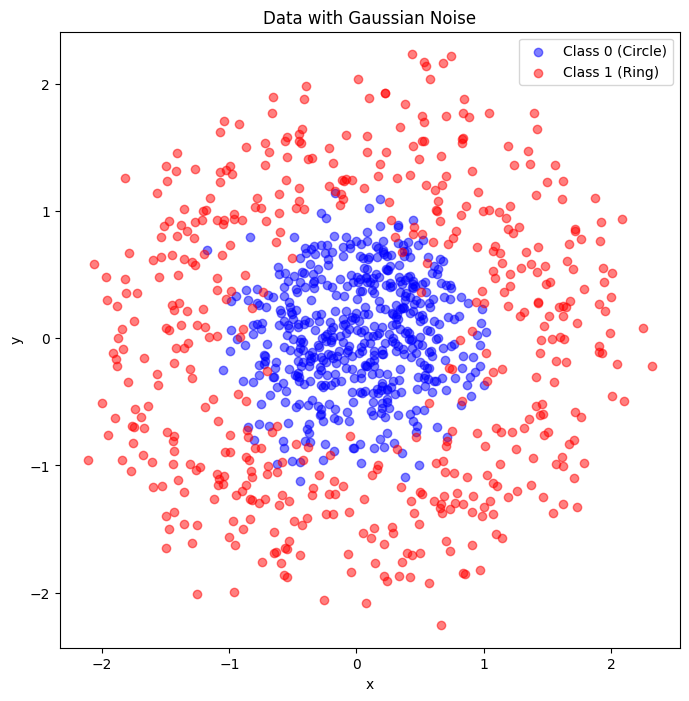

In [ ]:
noise_std = 0.2  # Стандартное отклонения для функции Гаусса

# Добавление шума (случайных отклонений) к обоим классам
x_circle_noisy = x_circle + np.random.normal(0, noise_std, N_per_class)
y_circle_noisy = y_circle + np.random.normal(0, noise_std, N_per_class)
x_ring_noisy = x_ring + np.random.normal(0, noise_std, N_per_class)
y_ring_noisy = y_ring + np.random.normal(0, noise_std, N_per_class)

# Формирование датасетов
X_train_noisy = np.vstack((
    np.column_stack((x_circle_noisy, y_circle_noisy)),
    np.column_stack((x_ring_noisy, y_ring_noisy))
))
y_train_noisy = np.hstack((np.zeros(N_per_class), np.ones(N_per_class)))

# Построение графика
plt.figure(figsize=(8, 8))
plt.scatter(x_circle_noisy, y_circle_noisy, color='blue', alpha=0.5, label='Class 0 (Circle)')
plt.scatter(x_ring_noisy, y_ring_noisy, color='red', alpha=0.5, label='Class 1 (Ring)')
plt.title('Data with Gaussian Noise')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.legend()
plt.show()

К этим данным примените третью модель.

In [ ]:
# Early stopping с увеличенным patience
early_stopping = EarlyStopping(monitor='accuracy', patience=7, restore_best_weights=True)

# Обучение и валидация модели
history = model3.fit(X_train_noisy, y_train_noisy, epochs=100, batch_size=16, callbacks=[early_stopping], validation_split=0.2)

# Вывод лучшей accuracy
best_train_accuracy = max(history.history['accuracy'])
print(f"Best accuracy: {best_train_accuracy:.4f}")

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9104 - loss: 0.1943 - val_accuracy: 0.9550 - val_loss: 0.1106
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9503 - loss: 0.1386 - val_accuracy: 0.9400 - val_loss: 0.1295
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9505 - loss: 0.1438 - val_accuracy: 0.9300 - val_loss: 0.1547
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9357 - loss: 0.1432 - val_accuracy: 0.9450 - val_loss: 0.1224
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9459 - loss: 0.1345 - val_accuracy: 0.9150 - val_loss: 0.2032
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9415 - loss: 0.1407 - val_accuracy: 0.9200 - val_loss: 0.1714
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9424 - loss: 0.1527 - val_accuracy: 0.9200 - val_loss: 0.1791
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9283 - loss: 0.1760 - val_accuracy: 0.9350 - v

Таким образом, модель немного хуже работает с датасетом с отклонениями (точность 95%) из-за повышенного разброса данных, снижения отношения сигнал/шум и сложности разделения перекрывающихся классов. Для увеличения точности необходимо изменение архитектуры модели и/или доп. методы.

## Классификация MNIST

Теперь решите задачу классификации для датасета MNIST. Загрузите его любым удобным способом и обучите FC-модель. Точность выше 90% считается удовлетворительной.

### Импорт данных

In [ ]:
# Импорт датасета MNIST
from keras.datasets import mnist

In [ ]:
# Загрузка тренировочных и тестовых данных
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
# Получение размера входных данных для нейросети
input_size = X_train[0].shape
input_size

(28, 28)

### Создание модели и классификация исходных данных

In [ ]:
# Создание модели
modelMNIST = Sequential()
# Первый слой - для конвернтации двумерной картинки в вектор
modelMNIST.add(Flatten(input_shape=input_size))
# Второй слой - скрытый с 128 нейронами
modelMNIST.add(Dense(units=128, input_shape=input_size))
# Функция активации ReLU для второго слоя
modelMNIST.add(Activation('relu'))
# Выходной слой с 10 нейронами
modelMNIST.add(Dense(units=10))
# Функция активации softmax для выходного слоя
modelMNIST.add(Activation('softmax'))

# Компиляция модели
modelMNIST.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Обучение модели
modelMNIST.fit(X_train, y_train, batch_size=64, epochs=16)

Epoch 1/16
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8197 - loss: 8.7207
Epoch 2/16
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9083 - loss: 0.4476
Epoch 3/16
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9330 - loss: 0.2824
Epoch 4/16
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9457 - loss: 0.2084
Epoch 5/16
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9468 - loss: 0.2072
Epoch 6/16
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9535 - loss: 0.1793
Epoch 7/16
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9570 - loss: 0.1625
Epoch 8/16
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9585 - loss: 0.1624
Epoch 9/16
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9615 - loss: 0.1506
Epoch 10/16
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9627 - loss: 0.1446
Epoch 11/16
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9653 - loss: 0.1302
Epoch 12/16
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step

In [ ]:
# Информация о модели
modelMNIST.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 10)                  │           1,290 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)

In [ ]:
# Валидация модели
modelMNIST.evaluate(X_test, y_test, batch_size=64)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9504 - loss: 0.2858


[0.2556968927383423, 0.9563000202178955]

**Результат работы модели на исходных ненормализованных данных**

Точность на тренировочной выборке - 97.08%    
Точность на тестовой выборке - 95.63%

### Классификация нормализованных данных

**Проведём нормализацию данных и one-hot encoding выходной переменной**

Каждый пиксель чёрно-белой картинки представлен в виде целого числа от  0  до  255. Поэтому нормализацию можно произвести простым делением на 255.

In [ ]:
X_train[0][5:8]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0]], dtype=uint8)

In [ ]:
# Нормализация данных
X_train=X_train/255
X_test=X_test/255

# one-hot encoding отклика
y_train=keras.utils.to_categorical(y_train,10)
y_test=keras.utils.to_categorical(y_test,10)

In [ ]:
X_train[0][5:8]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01176471, 0.07058824, 0.07058824,
        0.07058824, 0.49411765, 0.53333333, 0.68627451, 0.10196078,
        0.65098039, 1.        , 0.96862745, 0.49803922, 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.11764706, 0.14117647,
        0.36862745, 0.60392157, 0.66666667, 0.99215686, 0.99215686,
        0.99215686, 0.99215686, 0.99215686, 0.88235294, 0.6745098 ,
        0.99215686, 0.94901961, 0.76470588, 0.25098039, 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.19215686, 0.93333333, 0.99215686,
        0.99215686, 0.99215686, 0.99215686, 0.99215686, 0.99215686,
        0.99215686, 0.9921

In [ ]:
y_train[10]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [ ]:
# Компиляция модели
# Для one-hot encoded выходной переменной используется categorical_crossentropy
modelMNIST.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Обучение модели
modelMNIST.fit(X_train, y_train, batch_size=64, epochs=16)

Epoch 1/16
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8179 - loss: 0.6318
Epoch 2/16
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9671 - loss: 0.1163
Epoch 3/16
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9774 - loss: 0.0791
Epoch 4/16
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9830 - loss: 0.0600
Epoch 5/16
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9862 - loss: 0.0478
Epoch 6/16
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9895 - loss: 0.0367
Epoch 7/16
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9918 - loss: 0.0311
Epoch 8/16
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9937 - loss: 0.0242
Epoch 9/16
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9950 - loss: 0.0212
Epoch 10/16
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9959 - loss: 0.0177
Epoch 11/16
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9969 - loss: 0.0139
Epoch 12/16
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/ste

In [ ]:
# Валидация модели
modelMNIST.evaluate(X_test, y_test, batch_size=64)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9766 - loss: 0.1068


[0.08236082643270493, 0.9818000197410583]

**Результат работы модели на нормализованных данных**

Точность на тренировочной выборке - 99.89%    
Точность на тестовой выборке - 98.18%